<hr>

# Image Reconstruction using AutoEncoder

In this notebook we will explore:

1. Building of a autoencoder architecture.
2. Training.
3. A prediction example.

__Source__: https://www.analyticsvidhya.com/blog/2018/06/unsupervised-deep-learning-computer-vision/

# Import Libraries

In [4]:
from keras.datasets import fashion_mnist

In [5]:
%pylab inline
import os
import keras
import numpy as np
import pandas as pd
import keras.backend as K

from time import time
from sklearn.cluster import KMeans
from keras import callbacks
from keras.models import Model
from keras.optimizers import SGD
from keras.layers import Dense, Input
from keras.initializers import VarianceScaling
from keras.engine.topology import Layer, InputSpec

# from scipy.misc import imread
from sklearn.metrics import accuracy_score, normalized_mutual_info_score

Populating the interactive namespace from numpy and matplotlib


# Load DataSet

In [6]:
(train_x, train_y), (val_x, val_y) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


# Data Normalization

In [7]:
train_x = train_x/255.
val_x = val_x/255.

train_x = train_x.reshape(-1, 784)
val_x = val_x.reshape(-1, 784)

# Model

In [8]:
# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(2000, activation='relu')(input_img)
encoded = Dense(500, activation='relu')(encoded)
encoded = Dense(500, activation='relu')(encoded)
encoded = Dense(10, activation='sigmoid')(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(500, activation='relu')(encoded)
decoded = Dense(500, activation='relu')(decoded)
decoded = Dense(2000, activation='relu')(decoded)
decoded = Dense(784)(decoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [9]:
autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 2000)              1570000   
_________________________________________________________________
dense_1 (Dense)              (None, 500)               1000500   
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5010      
_________________________________________________________________
dense_4 (Dense)              (None, 500)               5500      
_________________________________________________________________
dense_5 (Dense)              (None, 500)              

In [10]:
encoder = Model(input_img, encoded)

# Training

In [11]:
autoencoder.compile(optimizer='adam', loss='mse')

In [12]:
estop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')

In [13]:
train_history = autoencoder.fit(train_x, train_x, epochs=500, batch_size=2048, validation_data=(val_x, val_x), callbacks=[estop])

Epoch 1/500
30/30 [==============================] - 1s 31ms/step - loss: 0.0907 - val_loss: 0.0662
Epoch 2/500
30/30 [==============================] - 1s 23ms/step - loss: 0.0603 - val_loss: 0.0519
Epoch 3/500
30/30 [==============================] - 1s 24ms/step - loss: 0.0456 - val_loss: 0.0405
Epoch 4/500
30/30 [==============================] - 1s 23ms/step - loss: 0.0384 - val_loss: 0.0378
Epoch 5/500
30/30 [==============================] - 1s 23ms/step - loss: 0.0362 - val_loss: 0.0343
Epoch 6/500
30/30 [==============================] - 1s 23ms/step - loss: 0.0329 - val_loss: 0.0306
Epoch 7/500
30/30 [==============================] - 1s 23ms/step - loss: 0.0290 - val_loss: 0.0293
Epoch 8/500
30/30 [==============================] - 1s 23ms/step - loss: 0.0261 - val_loss: 0.0248
Epoch 9/500
30/30 [==============================] - 1s 23ms/step - loss: 0.0241 - val_loss: 0.0236
Epoch 10/500
30/30 [==============================] - 1s 23ms/step - loss: 0.0232 - val_loss: 0.0225

# Prediction

In [14]:
pred = autoencoder.predict(val_x)

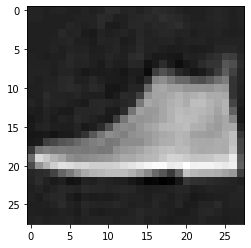

In [15]:
plt.imshow(pred[0].reshape(28, 28), cmap='gray')

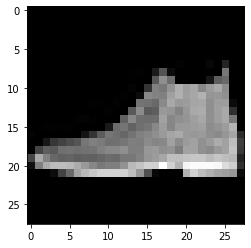

In [16]:
plt.imshow(val_x[0].reshape(28, 28), cmap='gray')